# 統計的仮説検定の考え方

**統計的仮説検定**はデータを用いて、数学的背理法と類似した方法により、仮説を検証する方法である。  
たとえば、ある母集団の平均がある値と異なることを示したい場合は、以下のように考える。  
(1)「母平均はある値と異なる」という命題Aを証明したい。  
(2)命題Aを否定し「母平均はある値と等しい」と仮定する。  
(3)(2)の仮定をもとにデータをとり、標本平均を求める。  
この標本平均が(2)の仮定のもとでは極めて稀にしか得られないほどずれているということを観察する。  
(4)命題Aの否定はおかしいと判断する。  
(5)命題Aは正しいと判断する。  
※確率的事象に基づいた判断であるため、当然ながら誤りが生じることがある点に注意が必要

# 検定法の導出

母平均$μ$が$μ_0$でないことを検証する統計的仮説検定を考える。  
このとき「母平均$μ$が$μ_0$ではない」という検証した仮説を**対立仮説**$H_1$  
それを否定した「母平均$μ$が$μ_0$である」という仮説を**帰無仮説**$H_0$とよび以下のように記述する。
$$
帰無仮説 H_0: μ=μ_0 \quad vs \quad 対立仮説 H_1: μ \neq μ_0
$$
その後**統計検定量**を求め、**有意水準**をもとに、$H_0$の**棄却**(=有意である)または、$H_0$の**受容**(=有意でない)を判断する。  
帰無仮説が棄却される領域は**棄却域**で、受容される領域は**受容域**と呼ばれる。  
これらの臨界点は**棄却限界値**あるいは**臨界値**とよばれる。

# P-値

**P-値**とは、帰無仮説$H_0$のもとで、現在観察されたデータが同じか、より稀にしか起こらないようなデータが観察される確率である。

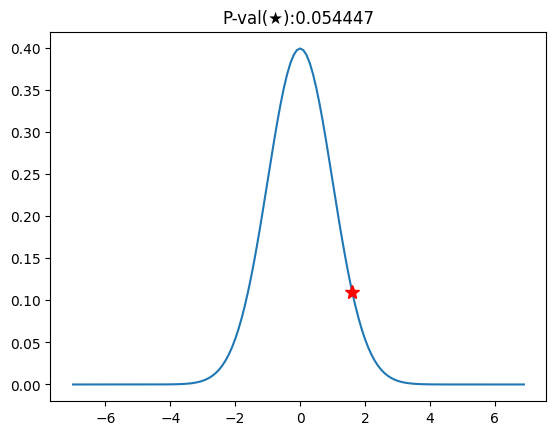

In [1]:
# P-値を表示
import math

import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from scipy.stats import norm

myu = 0

sample_size = 50
norm_sample = norm.rvs(loc=1, scale=2, size=sample_size)
sample_mean = norm_sample.mean()
sample_var = stat.variance(norm_sample)

z_val = (sample_mean-myu)/math.sqrt(sample_var/sample_size)

z_cdf = norm.cdf(x=z_val, loc=0, scale=1)
p_val = 1 - z_cdf

fig, ax = plt.subplots(1)
X = np.arange(-7,7,0.1)
Y = norm.pdf(X, 0, 1)
ax.plot(X, Y)
ax.plot(z_val, norm.pdf(z_val), '*', color='r', markersize=10)
plt.title(f"P-val(★):{p_val:.6f}")
plt.show()

# 検定の過誤

帰無仮説$H_0$が真に正しいとしても、有意と判定されることがある。  
この誤りを**第一種の過誤**とよぶ。有意水準$\alpha$により制御される。  
一方で対立仮説$H_1$が真に正しいとしても、有意と判定されないこともある。  
この誤りを**第二種の過誤**とよび、その確率は$\beta$であらわす。  
対立仮説を正しく有意と判定する確率は$1- \beta$であり、この確率は**検出力**とよばれる。  
まとめると以下の表のとおり。  

|  | $H_0$が真 | $H_0$が偽 |
| :---: | :---: | :---: |
| $H_0$を棄却しない | $1- \alpha$ | $\beta$ |
| $H_0$を棄却する | $\alpha$ | $1- \beta$(検出力) |

# サンプルサイズの設計

帰無仮説$H_0$のもとでの統計検定量$Z_0$の分布は標準正規分布$N(0,1)$である。  
一方、対立仮説$H_1$として母平均$\mu$が$\mu_1$とすると、検定統計量の期待値は$E[Z_0] = \frac{\mu_1 - \mu_0}{\sqrt{\sigma^2/n}}$となり、検定統計量$Z_0$の分布は$N(\frac{\mu_1 - \mu_0}{\sqrt{\sigma^2/n}},1)$となる。  
$H_0$のもとでの$Z_0$の分布と$H_1$のもとでの$Z_0$の分布は重なっており、棄却限界域を境として、第一種の過誤$\alpha$と第二種の過誤$\beta$が正規分布の裾の面積として定義できる。  
$\alpha$を小さくするために棄却限界値を大きくすれば、$\beta$の面積は大きくなる。  
逆に、$\beta$を小さくするために棄却限界値を小さくすれば、$\alpha$の面積は大きくなる。  
したがって、$\alpha$と$\beta$はトレードオフの関係にあることがわかる。  
一方で、対立仮説の正規分布の平均に着目すると、分子は対立仮説に置ける平均$\mu_1$と帰無仮説における平均$\mu_0$の差となっている。  
また、分母は分散$\sigma^2$とサンプルサイズ$n$の比の平方根となっている。  
したがって、対立仮説と帰無仮説の平均の差が大きければ大きいほど、またサンプルサイズが大きければ大きいほど、2つの正規分布が離れることがわかる。  
$\alpha$が一定の下では、$2$つの正規分布が離れれば離れるほど$\beta$が小さくなる。  
サンプルサイズ設計では、この性質を利用して、一定の検出力を確保するためのサンプルサイズ$n$を求める。  
$H_0$における棄却限界値を$z_{\alpha/2}$、$H_1$における\betaに対応する正規分位点の値を$z_{\beta}$とすると、サンプルサイズ$n$を求めるための等式は以下のようになる。  
$$
z_{\alpha/2} + z_{\beta} = \frac{\mu_1 - \mu_0}{\sqrt{\sigma^2/n}}
$$
上記の式を$n$について解くとサンプルサイズが求まる。

In [12]:
# 上記の指揮を使ってサンプルサイズを求める
myu0 = 0
std0 = 1

myu1 = 1.5
std1 = 1
sample_size = 500
norm_sample = norm.rvs(loc=myu1, scale=std1, size=sample_size)
sample_mean = norm_sample.mean()
sample_var = stat.variance(norm_sample)

beta_val = 0.1
h0_critical_val = norm.ppf(q=0.975, loc=myu0, scale=std0)
h1_normal_quantile = norm.ppf(q=beta_val, loc=myu0, scale=std0)
n_result = pow(abs(h0_critical_val)+abs(h1_normal_quantile), 2)/pow((myu1-myu0)/math.sqrt(sample_var), 2)
print(f"検出力{1-beta_val}に必要なサンプルサイズ：{n_result:.3f}")

検出力0.9に必要なサンプルサイズ：4.722


# 抜取検査

**抜取検査**とは、日本産業企画(JIS)において「検査ロットから、あらかじめ定められた抜取検査方式に従って、サンプルを抜き取って試験し、その結果をロットの判定基準と比較して、そのロットの合格・不合格を判定する検査」と定義されている。  
本来は合格である検査ロットが不合格と判定される確率$FP$は**生産者危険**、本来は不合格品である検査ロットが合格と判定される確率$FN$は**消費者危険**とよばれる。  
なお、不良個数は二項分布$B(n, p)$に従う。($p$は不良率)